<a href="https://colab.research.google.com/github/tesa0/ML_python/blob/main/DFpreparation%2BSequential_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np 
import pandas as pd
import seaborn as sb     
import matplotlib.pyplot as plt     
import datetime
from datetime import datetime

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization 
from tensorflow.keras import utils   
from tensorflow.keras.optimizers import Adam, Adadelta 
from sklearn.utils import shuffle
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, precision_score, recall_score,precision_recall_curve
from tensorflow.keras.callbacks import ModelCheckpoint,Callback,BackupAndRestore

%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')
file_path1 = '/content/drive/MyDrive/MA/t1_20220101_20220726_rg_201589066.csv'            # счетчик 1.1, цель 201589066, 22-01-01 - 22-07-26 visits

df = pd.read_csv(file_path1, header=0)
df1 = df.copy()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (12,39,51,52) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [16]:
col1= list(df1.columns) # счетчик 1.1, цель 201589066, 22-01-01 - 22-07-26 visits
# df1.columns
df1 = df1.drop(['Unnamed: 0.1','Unnamed: 0','ym:s:from','ym:s:lastSocialNetworkProfile',
                'ym:s:lastSocialNetwork','ym:s:openstatAd','ym:s:openstatCampaign','ym:s:openstatService',
                'ym:s:openstatSource','ym:s:browserCountry','ym:s:firstGCLID','ym:s:lastDirectClickOrder',
                'ym:s:lastDirectPlatform','ym:s:lastGCLID','ym:s:lastReferalSource',
                'ym:s:lastSignificantGCLID','ym:s:networkType', 'ym:s:referer','ym:s:regionCity',
                'ym:s:UTMCampaign','ym:s:UTMContent','ym:s:UTMSource','ym:s:UTMTerm','ym:s:browserLanguage',
                'ym:s:cookieEnabled','ym:s:goalsPrice','ym:s:goalsSerialNumber',
                'ym:s:ipAddress','ym:s:impressionsProductCoupon','ym:s:offlineCallHoldDuration',
                'ym:s:offlineCallMissed','ym:s:offlineCallURL','ym:s:watchIDs'], axis=1)

In [17]:
df1['ym:s:date'] = [pd.to_datetime(x) for x in df1['ym:s:date']]

In [18]:
df1['ym:s:lastDirectBannerGroup'] = [0 if el==0 else 1 for el in df1['ym:s:lastDirectBannerGroup']]

df1['ym:s:offlineCallTag'] = ['1' if '1' in el else el for el in df1['ym:s:offlineCallTag']]
df1['ym:s:offlineCallTag'] = ['1' if '2' in el else el for el in df1['ym:s:offlineCallTag']]
df1['ym:s:offlineCallTag'] = ['1' if '3' in el else el for el in df1['ym:s:offlineCallTag']]
df1['ym:s:offlineCallTag'] = ['1' if '4' in el else el for el in df1['ym:s:offlineCallTag']]
df1['ym:s:offlineCallTag'] = [1 if '1' in el else 0 for el in df1['ym:s:offlineCallTag']]

df1['ym:s:endURL'] = [x[7:] for x in df1['ym:s:endURL']]
df1['ym:s:startURL'] = [x[9:] for x in df1['ym:s:startURL']]

df1['ym:s:offlineCallTalkDuration'] = [x[1:-1] for x in df1['ym:s:offlineCallTalkDuration']]
df1['ym:s:offlineCallTalkDuration'] = [x.replace("''","") for x in df1['ym:s:offlineCallTalkDuration']]
df1['ym:s:offlineCallTalkDuration'] = ['0' if x == '' else max(x.split(',')) for x in df1['ym:s:offlineCallTalkDuration']]
df1['ym:s:offlineCallTalkDuration'] = [int(x) for x in df1['ym:s:offlineCallTalkDuration']]
df1['ym:s:offlineCallTalkDuration'] = df1['ym:s:offlineCallTalkDuration']/max(df1['ym:s:offlineCallTalkDuration'])

df1['ym:s:diagonal'] = ((df1['ym:s:screenHeight']**2+df1['ym:s:screenWidth']**2)**0.5)
df1['ym:s:diagonal'] = round(df1['ym:s:diagonal'] / max(df1['ym:s:diagonal']),2)

df1 = df1.drop(['ym:s:screenHeight', 'ym:s:screenWidth'], axis=1)

df1['ym:s:lastDirectClickBanner'] = [0 if el==0 else 1 for el in df1['ym:s:lastDirectClickBanner']]

df1['ym:s:lastDirectClickBannerName'] = [x[26:] for x in df1['ym:s:lastDirectClickBannerName']]
df1['ym:s:lastDirectClickBannerName'] = [int(x) for x in df1['ym:s:lastDirectClickBannerName']]
df1['ym:s:lastDirectClickBannerName'] = round((df1['ym:s:lastDirectClickBannerName'])/max(df1['ym:s:lastDirectClickBannerName']),2)

df1['ym:s:visitDuration'] = round((df1['ym:s:visitDuration'])/max(df1['ym:s:visitDuration']),2)

df1['ym:s:lastClickBannerGroupName'] = [el.lower() for el in df1['ym:s:lastClickBannerGroupName']]
df1['ym:s:lastClickBannerGroupName'] = ['2022' if '2022' in el else el for el in df1['ym:s:lastClickBannerGroupName']]
df1['ym:s:lastClickBannerGroupName'] = ['фили' if 'фили' in el else el for el in df1['ym:s:lastClickBannerGroupName']]
df1['ym:s:lastClickBannerGroupName'] = ['Headliner' if 'headliner' in el else el for el in df1['ym:s:lastClickBannerGroupName']]
df1['ym:s:lastClickBannerGroupName'] = ['застройщик' if 'застройщик' in el else el for el in df1['ym:s:lastClickBannerGroupName']]
df1['ym:s:lastClickBannerGroupName'] = ['Не отказ' if 'не отказ' in el else el for el in df1['ym:s:lastClickBannerGroupName']]
df1['ym:s:lastClickBannerGroupName'] = ['конкурент' if 'конкурент' in el else el for el in df1['ym:s:lastClickBannerGroupName']]
df1['ym:s:lastClickBannerGroupName'] = ['запрос' if 'запрос' in el else el for el in df1['ym:s:lastClickBannerGroupName']]
df1['ym:s:lastClickBannerGroupName'] = ['2021' if '2021' in el else el for el in df1['ym:s:lastClickBannerGroupName']]
df1['ym:s:lastClickBannerGroupName'] = ['жк' if 'жк' in el else el for el in df1['ym:s:lastClickBannerGroupName']]
df1['ym:s:lastClickBannerGroupName'] = ['центр сити' if 'центр сити' in el else el for el in df1['ym:s:lastClickBannerGroupName']]
df1['ym:s:lastClickBannerGroupName'] = ['москва' if 'москв' in el else el for el in df1['ym:s:lastClickBannerGroupName']]

df1['ym:s:lastDirectPhraseOrCond'] = [x[23:] for x in df1['ym:s:lastDirectPhraseOrCond']]

df1['ym:s:goalsDateTime'] = [x.replace("[","") for x in df1['ym:s:goalsDateTime']]
df1['ym:s:goalsDateTime'] = [x.replace("]","") for x in df1['ym:s:goalsDateTime']]
df1['ym:s:goalsDateTime'] = [x[2:12] for x in df1['ym:s:goalsDateTime']]
df1 = df1.drop(df1[df1['ym:s:goalsDateTime']==''].index) # ---------------------------------------------
df1['ym:s:goalsDateTime'] = [datetime.strptime(x, '%Y-%m-%d') for x in df1['ym:s:goalsDateTime']]

df1['ym:s:deltaTime'] = df1['ym:s:goalsDateTime'] - df1['ym:s:date']
df1['ym:s:deltaTime'] = [x.components.days for x in df1['ym:s:deltaTime']]
df1['ym:s:deltaTime'] = df1['ym:s:deltaTime']/max(df1['ym:s:deltaTime'] )

df1 = df1.drop(['ym:s:date', 'ym:s:goalsDateTime'], axis=1)

# модель с учителем
df1['Y'] = [1 if '201589066' in el else 0 for el in df1['ym:s:goalsID']]
df1 = df1.drop(['ym:s:visitID','ym:s:clientID','ym:s:goalsID'], axis=1)
df1 = df1.dropna(axis=1)
     

In [19]:
# will be categories :
# Названия колонок которые необходимо закодирвать
cols_encode = ['ym:s:lastAdvEngine', 'ym:s:deviceCategory', 'ym:s:hasGCLID', 'ym:s:isNewUser', 
               'ym:s:javascriptEnabled', 'ym:s:lastDirectBannerGroup', 'ym:s:lastDirectClickBanner',
               'ym:s:offlineCallTag','ym:s:pageViews','ym:s:screenOrientation','ym:s:startURL',
               'ym:s:endURL','ym:s:bounce','ym:s:lastClickBannerGroupName','ym:s:lastClickBannerGroupName',
               'ym:s:lastDirectClickOrderName','ym:s:lastDirectPhraseOrCond', 'ym:s:lastTrafficSource'] 
df1[cols_encode].replace(pd.NA,'empty') 

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for col in cols_encode:
  df1[col]=le.fit_transform(df1[col])

# df1[cols_encode]
df1['Y'].value_counts()
     

<ipython-input-19-696163cee1f2>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col]=le.fit_transform(df1[col])


0    121641
1      1307
Name: Y, dtype: int64

In [20]:
# numbers too big
col_big_nums = ['ym:s:endURL', 'ym:s:lastDirectPhraseOrCond','ym:s:startURL','ym:s:lastDirectClickOrderName','ym:s:lastClickBannerGroupName']
df1 = df1.drop(col_big_nums, axis=1)
# df1.describe().transpose()[['count',	'mean',	'std',	'min', 'max']] 
df1['Y'].value_counts()
     

0    121641
1      1307
Name: Y, dtype: int64

In [21]:
# что осталосьобработать: на время можно удалить из модели

# for el in [ 'ym:s:lastDirectClickOrderName']:
#        print(len(df1))
#        print(df1[el].unique()[:5])


In [22]:
df1 = df1.drop(['ym:s:offlineCallFirstTimeCaller'], axis=1)
df1['Y'].value_counts()
     

0    121641
1      1307
Name: Y, dtype: int64

In [23]:
# df1.to_csv (r'/content/drive/MyDrive/MA/ma1.csv', index = False, header=True)
df1

,ym:s:bounce,ym:s:deviceCategory,ym:s:hasGCLID,ym:s:isNewUser,ym:s:javascriptEnabled,ym:s:lastAdvEngine,ym:s:lastDirectBannerGroup,ym:s:lastDirectClickBanner,ym:s:lastDirectClickBannerName,ym:s:lastTrafficSource,ym:s:offlineCallTag,ym:s:offlineCallTalkDuration,ym:s:pageViews,ym:s:screenOrientation,ym:s:visitDuration,ym:s:diagonal,ym:s:deltaTime,Y
3,0,1,0,1,1,7,1,1,0.00,0,0,0.0,1,1,0.00,0.14,0.0,0
7,0,0,0,1,1,8,0,1,0.00,1,0,0.0,6,2,0.07,0.34,0.0,0
15,0,1,0,0,1,8,0,1,0.01,2,0,0.0,1,1,0.00,0.16,0.0,0
17,0,0,0,1,1,2,0,1,0.01,0,0,0.0,1,2,0.00,0.45,0.0,0
19,0,1,0,1,1,5,0,1,0.01,0,0,0.0,2,1,0.00,0.14,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361894,0,1,0,0,1,8,0,0,0.00,0,0,0.0,1,1,0.04,0.13,0.0,0
361895,0,1,0,1,1,2,0,0,0.00,0,0,0.0,2,1,0.03,0.14,0.0,0
361908,0,1,0,1,1,7,1,1,0.02,0,0,0.0,0,1,0.01,0.11,0.0,0
361912,0,0,1,1,1,9,0,0,0.00,0,0,0.0,1,2,0.01,0.24,0.0,0


In [24]:
df1['Y'].value_counts()

0    121641
1      1307
Name: Y, dtype: int64

Model sequential

In [25]:
df1 = shuffle(df1,random_state=42)

df1_1 = df1[df1['Y']==1]
# print(len(df1_0),len(df1_1))
df1_0 = df1[df1['Y']==0][:1307] # проверяем на модели 
len(df1_0)
df1_all = pd.concat([df1_0,df1_1], axis=0)
cols = list(df1.columns)

X = df1_all[cols[:-1]]
y = df1_all['Y']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print('Размер x_train:',X_train.shape)                             
print('Размер y_train:',y_train.shape)
print('Размер x_test:',X_test.shape)
print('Размер y_test:',y_test.shape)

CLASS_COUNT=2

y_train = utils.to_categorical(y_train, CLASS_COUNT)
y_test = utils.to_categorical(y_test, CLASS_COUNT)

Размер x_train: (2352, 17)
Размер y_train: (2352,)
Размер x_test: (262, 17)
Размер y_test: (262,)


Epoch 1/42
61/74 [=======================>......] - ETA: 0s - loss: 0.5610 - accuracy: 0.7141
Epoch 1: val_accuracy improved from -inf to 0.84351, saving model to modeldense.mcp.1700.relu.32


74/74 [==============================] - 1s 9ms/step - loss: 0.5428 - accuracy: 0.7279 - val_loss: 0.3928 - val_accuracy: 0.8435
Epoch 2/42
67/74 [==========================>...] - ETA: 0s - loss: 0.3781 - accuracy: 0.8321
Epoch 2: val_accuracy improved from 0.84351 to 0.87786, saving model to modeldense.mcp.1700.relu.32


74/74 [==============================] - 0s 7ms/step - loss: 0.3769 - accuracy: 0.8304 - val_loss: 0.3124 - val_accuracy: 0.8779
Epoch 3/42
71/74 [===========================>..] - ETA: 0s - loss: 0.3118 - accuracy: 0.8631
Epoch 3: val_accuracy improved from 0.87786 to 0.88550, saving model to modeldense.mcp.1700.relu.32


74/74 [==============================] - 1s 7ms/step - loss: 0.3140 - accuracy: 0.8622 - val_loss: 0.2848 - val_accuracy: 0.8855
Epoch 4/42
65/74 [=========================>....] - ETA: 0s - loss: 0.2576 - accuracy: 0.8962
Epoch 4: val_accuracy improved from 0.88550 to 0.89695, saving model to modeldense.mcp.1700.relu.32


74/74 [==============================] - 1s 7ms/step - loss: 0.2546 - accuracy: 0.8967 - val_loss: 0.2646 - val_accuracy: 0.8969
Epoch 5/42
65/74 [=========================>....] - ETA: 0s - loss: 0.2090 - accuracy: 0.9139
Epoch 5: val_accuracy improved from 0.89695 to 0.95420, saving model to modeldense.mcp.1700.relu.32


74/74 [==============================] - 1s 7ms/step - loss: 0.2043 - accuracy: 0.9167 - val_loss: 0.1532 - val_accuracy: 0.9542
Epoch 6/42
66/74 [=========================>....] - ETA: 0s - loss: 0.1958 - accuracy: 0.9290
Epoch 6: val_accuracy did not improve from 0.95420
74/74 [==============================] - 0s 2ms/step - loss: 0.1989 - accuracy: 0.9294 - val_loss: 0.2244 - val_accuracy: 0.9198
Epoch 7/42
62/74 [========================>.....] - ETA: 0s - loss: 0.1494 - accuracy: 0.9496
Epoch 7: val_accuracy improved from 0.95420 to 0.97328, saving model to modeldense.mcp.1700.relu.32


74/74 [==============================] - 1s 7ms/step - loss: 0.1424 - accuracy: 0.9515 - val_loss: 0.0982 - val_accuracy: 0.9733
Epoch 8/42
66/74 [=========================>....] - ETA: 0s - loss: 0.1168 - accuracy: 0.9598
Epoch 8: val_accuracy did not improve from 0.97328
74/74 [==============================] - 0s 2ms/step - loss: 0.1160 - accuracy: 0.9600 - val_loss: 0.1111 - val_accuracy: 0.9504
Epoch 9/42
46/74 [=================>............] - ETA: 0s - loss: 0.0957 - accuracy: 0.9681
Epoch 9: val_accuracy did not improve from 0.97328
74/74 [==============================] - 0s 2ms/step - loss: 0.1020 - accuracy: 0.9673 - val_loss: 0.0877 - val_accuracy: 0.9618
Epoch 10/42
54/74 [====================>.........] - ETA: 0s - loss: 0.0892 - accuracy: 0.9716
Epoch 10: val_accuracy did not improve from 0.97328
74/74 [==============================] - 0s 2ms/step - loss: 0.0930 - accuracy: 0.9694 - val_loss: 0.2634 - val_accuracy: 0.9160
Epoch 11/42
55/74 [=====================>......

74/74 [==============================] - 0s 7ms/step - loss: 0.0969 - accuracy: 0.9707 - val_loss: 0.0525 - val_accuracy: 0.9809
Epoch 13/42
53/74 [====================>.........] - ETA: 0s - loss: 0.0597 - accuracy: 0.9841
Epoch 13: val_accuracy did not improve from 0.98092
74/74 [==============================] - 0s 2ms/step - loss: 0.0535 - accuracy: 0.9860 - val_loss: 0.0464 - val_accuracy: 0.9809
Epoch 14/42
68/74 [==========================>...] - ETA: 0s - loss: 0.0657 - accuracy: 0.9798
Epoch 14: val_accuracy improved from 0.98092 to 0.98473, saving model to modeldense.mcp.1700.relu.32


74/74 [==============================] - 0s 6ms/step - loss: 0.0723 - accuracy: 0.9775 - val_loss: 0.1148 - val_accuracy: 0.9847
Epoch 15/42
62/74 [========================>.....] - ETA: 0s - loss: 0.0831 - accuracy: 0.9677
Epoch 15: val_accuracy did not improve from 0.98473
74/74 [==============================] - 0s 2ms/step - loss: 0.0789 - accuracy: 0.9694 - val_loss: 0.0524 - val_accuracy: 0.9809
Epoch 16/42
67/74 [==========================>...] - ETA: 0s - loss: 0.0918 - accuracy: 0.9748
Epoch 16: val_accuracy did not improve from 0.98473
74/74 [==============================] - 0s 2ms/step - loss: 0.1060 - accuracy: 0.9694 - val_loss: 0.0862 - val_accuracy: 0.9695
Epoch 17/42
60/74 [=======================>......] - ETA: 0s - loss: 0.0948 - accuracy: 0.9651
Epoch 17: val_accuracy did not improve from 0.98473
74/74 [==============================] - 0s 2ms/step - loss: 0.0920 - accuracy: 0.9668 - val_loss: 0.1516 - val_accuracy: 0.9580
Epoch 18/42
64/74 [========================

74/74 [==============================] - 1s 7ms/step - loss: 0.0341 - accuracy: 0.9919 - val_loss: 0.0243 - val_accuracy: 0.9962
Epoch 24/42
67/74 [==========================>...] - ETA: 0s - loss: 0.0308 - accuracy: 0.9911
Epoch 24: val_accuracy did not improve from 0.99618
74/74 [==============================] - 0s 2ms/step - loss: 0.0323 - accuracy: 0.9911 - val_loss: 0.0317 - val_accuracy: 0.9962
Epoch 25/42
70/74 [===========================>..] - ETA: 0s - loss: 0.0924 - accuracy: 0.9719
Epoch 25: val_accuracy did not improve from 0.99618
74/74 [==============================] - 0s 2ms/step - loss: 0.0910 - accuracy: 0.9732 - val_loss: 0.0368 - val_accuracy: 0.9771
Epoch 26/42
63/74 [========================>.....] - ETA: 0s - loss: 0.0326 - accuracy: 0.9916
Epoch 26: val_accuracy did not improve from 0.99618
74/74 [==============================] - 0s 2ms/step - loss: 0.0310 - accuracy: 0.9923 - val_loss: 0.0312 - val_accuracy: 0.9847
Epoch 27/42
69/74 [========================

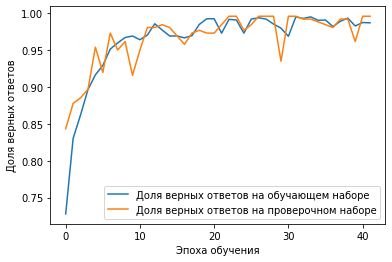

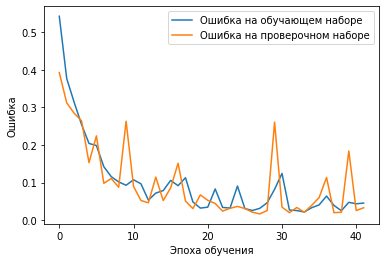

In [27]:
data_list_dense = []
layers=[1700]
activations=['relu']
adam_rate=[0.005]
batch_sizes=[32] # кол-во примеров, которое обрабатывает нейронка перед одним изменением весов

for layer in layers:
  for activation in activations:
    for batch in batch_sizes:
      for lr in adam_rate:
      
        model = Sequential()
        
        modelcheckpoint_1 = ModelCheckpoint(filepath=f'modeldense.mcp.{layer}.{activation}.{batch}', monitor="val_accuracy", mode="max", verbose=1, save_best_only=True) # --- how to use????

        model.add(Dense(layer, input_dim=X_train.shape[1], use_bias = True, activation=activation)) 
        model.add(Dense(CLASS_COUNT, activation='softmax')) 
        model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=lr), metrics=["accuracy"])
        
        # print(f'Neuron layer: {layer}, activation: {activation}, batch_size: {batch}')
        history = model.fit(X_train, y_train, epochs=42, validation_data=(X_test, y_test), shuffle = True, callbacks=[modelcheckpoint_1], batch_size=batch, verbose=1) 
        # model.load_weights(f'model.mcp.{layer}.{activation}.{batch}')


        data_list_dense.append(('Neurons:', layer, 'Activation:', activation, 'Batch: ', batch, 'Learning rate: ', lr, 
                          'Max_accuracy:', round(max(history.history['accuracy']), 2),
                          'Val_accuracy of best train accuracy:', round(history.history['val_accuracy'][np.argmax(history.history['accuracy'])], 2),
                          'Validation accuracy:', round(history.history['val_accuracy'][9], 2)))     
        
       
        print('\n\n')
        print('_________________________________________________________________')
        print(model.summary())
        # Построим графики точности на обучающей и проверочной выборках на протяжении всего обучения:
        import matplotlib.pyplot as plt    
        plt.plot(history.history['accuracy'], 
                label='Доля верных ответов на обучающем наборе')
        plt.plot(history.history['val_accuracy'], 
                label='Доля верных ответов на проверочном наборе')
        plt.xlabel('Эпоха обучения')
        plt.ylabel('Доля верных ответов')
        plt.legend()
        plt.show()

        # графики ошибки:
        plt.plot(history.history['loss'], 
                label='Ошибка на обучающем наборе')
        plt.plot(history.history['val_loss'], 
                label='Ошибка на проверочном наборе')
        plt.xlabel('Эпоха обучения')
        plt.ylabel('Ошибка')
        plt.legend()
        plt.show()

In [28]:
# Вывод результатов экспериментов  с modelcheckpoint_1
for i in data_list_dense:
    print(i)

('Neurons:', 1700, 'Activation:', 'relu', 'Batch: ', 32, 'Learning rate: ', 0.005, 'Max_accuracy:', 1.0, 'Val_accuracy of best train accuracy:', 1.0, 'Validation accuracy:', 0.92)
